# Jack's Car Rental Problem
We implement policy iteration for the simple and advanced version of this and display the evolution of policies through the iteration along with a plot of the final value function.

## Simple Situation
As described in the text of the book, we want to just replicate results by recreating the diagrams.

In [104]:
from car_rental_solver import CarRentalSolver
import matplotlib.pyplot as plt
from typing import List
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
# Constants describing the parameters of the problem
RENT_MULTIPLIER = 10
MOVE_COST = 2
LAMBDA_LOC1_REQUESTS = 3
LAMBDA_LOC2_REQUESTS = 4
LAMBDA_LOC1_RETURNS = 3
LAMBDA_LOC2_RETURNS = 2
MAX_CAR_AT_LOC = 20
MAX_CAR_MOVED = 5
GAMMA = 0.9

TOL = 1e-3

In [107]:
car_rental_solver = CarRentalSolver(
    rent_multiplier=RENT_MULTIPLIER,
    move_cost=MOVE_COST,
    lambda_loc1_requests=LAMBDA_LOC1_REQUESTS,
    lambda_loc2_requests=LAMBDA_LOC2_REQUESTS,
    lambda_loc1_returns=LAMBDA_LOC1_RETURNS,
    lambda_loc2_returns=LAMBDA_LOC2_RETURNS,
    max_car_at_loc=MAX_CAR_AT_LOC,
    max_car_moved=MAX_CAR_MOVED,
    gamma=GAMMA,
    tol=TOL,
)

In [ ]:
policies, value_fn = car_rental_solver.solve(num_iter=10)

In [99]:
def plot_policies(policies: List[np.ndarray]):
    # Flatten all arrays to find global contour levels (so colors are consistent across policies)
    all_values = np.concatenate([p.ravel() for p in policies])
    vmin, vmax = all_values.min(), all_values.max()
    
    # Choose fixed contour levels
    # If values are integers, create a range of levels that covers min to max inclusive
    if np.all(all_values.astype(int) == all_values):
        levels = np.arange(vmin, vmax + 1)
    else:
        levels = np.linspace(vmin, vmax, 10)  # arbitrary for continuous data
    
    n_plots = len(policies)
    fig, axes = plt.subplots(1, n_plots, figsize=(5*n_plots, 5), squeeze=False)
    
    for ax, data, title in zip(
        axes[0],
        policies,
        [f"Policy {i}" for i in range(len(policies))]
    ):
        # Create contour plot
        c = ax.contourf(data, levels=levels, cmap='coolwarm', extend='both')
        
        # Draw contour lines and label them
        cs = ax.contour(data, levels=levels, colors='black', linewidths=0.5)
        ax.clabel(cs, inline=True, fontsize=8, fmt='%d')
        
        # Set ticks only at 0 and max
        ax.set_xticks([0, data.shape[1]-1])
        ax.set_yticks([0, data.shape[0]-1])
        
        # Set labels
        ax.set_xlabel('#Cars at second location')
        ax.set_ylabel('#Cars at first location')
        ax.set_title(title)
    
    # Add a shared colorbar
    fig.colorbar(c, ax=axes[0].tolist(), orientation='vertical')
    plt.tight_layout()
    plt.show()

/var/folders/z8/1d183zgx3c11zg5s3n3byg700000gn/T/ipykernel_51475/1365450251.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


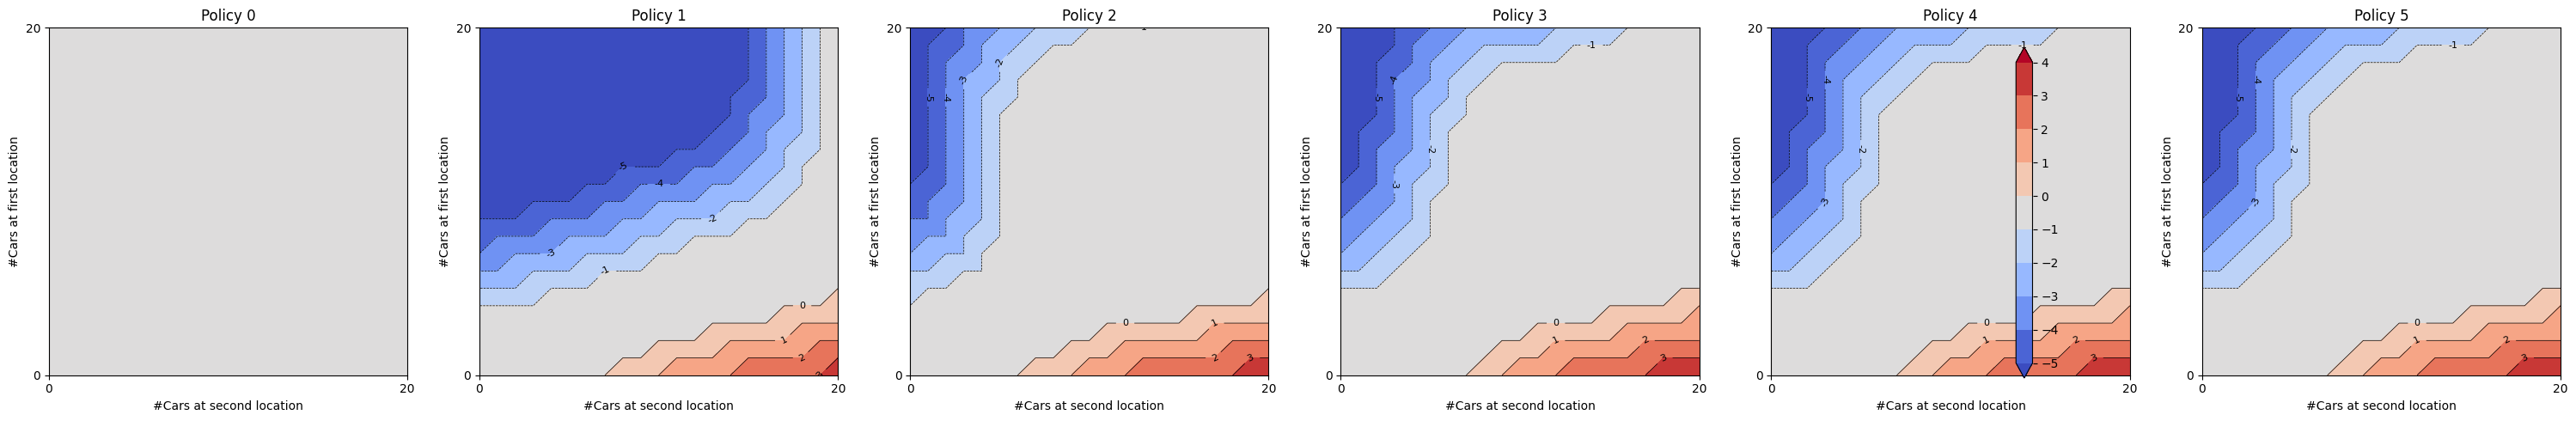

In [ ]:
plot_policies(policies)

In [110]:
# Plot value_fn
def plot_value_fn(value_fn: np.ndarray) -> None:
    x = np.arange(value_fn.shape[0])  # cars at first
    y = np.arange(value_fn.shape[1])  # cars at second
    X, Y = np.meshgrid(x, y, indexing="ij")  # match indices with array convention

    Z = value_fn

    # Plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")

    ax.set_xlabel("# cars at first location")
    ax.set_ylabel("# cars at second location")
    ax.set_zlabel("Value")
    ax.set_title("Value Function")

    plt.show()

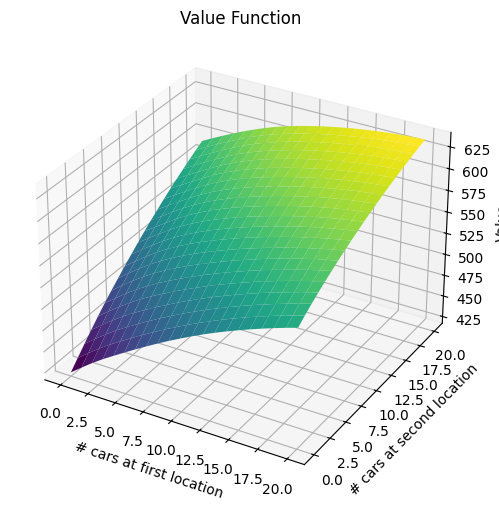

In [111]:
plot_value_fn(value_fn)

## Alterations
We now get one move for free from location 1 to location 2, so have to slightly alter our reward calculation. Furthermore, we incur a penalty if we overflow (more than 
10 cars at a location *after* moves).

In [108]:
OVERFLOW_LIMIT = 10
OVERFLOW_COST = 4

In [112]:
car_rental_solver_altered = CarRentalSolver(
    rent_multiplier=RENT_MULTIPLIER,
    move_cost=MOVE_COST,
    lambda_loc1_requests=LAMBDA_LOC1_REQUESTS,
    lambda_loc2_requests=LAMBDA_LOC2_REQUESTS,
    lambda_loc1_returns=LAMBDA_LOC1_RETURNS,
    lambda_loc2_returns=LAMBDA_LOC2_RETURNS,
    max_car_at_loc=MAX_CAR_AT_LOC,
    max_car_moved=MAX_CAR_MOVED,
    gamma=GAMMA,
    tol=TOL,
    move_benefit=True,
    overflow_limit=OVERFLOW_LIMIT,
    overflow_cost=OVERFLOW_COST,
)

In [113]:
policies, value_fn = car_rental_solver_altered.solve(num_iter=10)

iter_no=1; delta=np.float64(189.46566623633953)
iter_no=2; delta=np.float64(112.76450025990485)
iter_no=3; delta=np.float64(76.61352311492209)
iter_no=4; delta=np.float64(61.51526729260871)
iter_no=5; delta=np.float64(48.53217181709289)
iter_no=6; delta=np.float64(37.41916302782988)
iter_no=7; delta=np.float64(29.028535555875408)
iter_no=8; delta=np.float64(22.89571019146041)
iter_no=9; delta=np.float64(18.82819479255869)
iter_no=10; delta=np.float64(15.778506207813962)
iter_no=11; delta=np.float64(13.199841142277421)
iter_no=12; delta=np.float64(11.02389838068109)
iter_no=13; delta=np.float64(9.19083652757763)
iter_no=14; delta=np.float64(7.64956798600042)
iter_no=15; delta=np.float64(6.356456545613753)
iter_no=16; delta=np.float64(5.27402231801625)
iter_no=17; delta=np.float64(4.36997402270373)
iter_no=18; delta=np.float64(3.6165043707450764)
iter_no=19; delta=np.float64(2.9897389164817696)
iter_no=20; delta=np.float64(2.4692665232428226)
iter_no=21; delta=np.float64(2.03771722614465

/var/folders/z8/1d183zgx3c11zg5s3n3byg700000gn/T/ipykernel_51475/1365450251.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


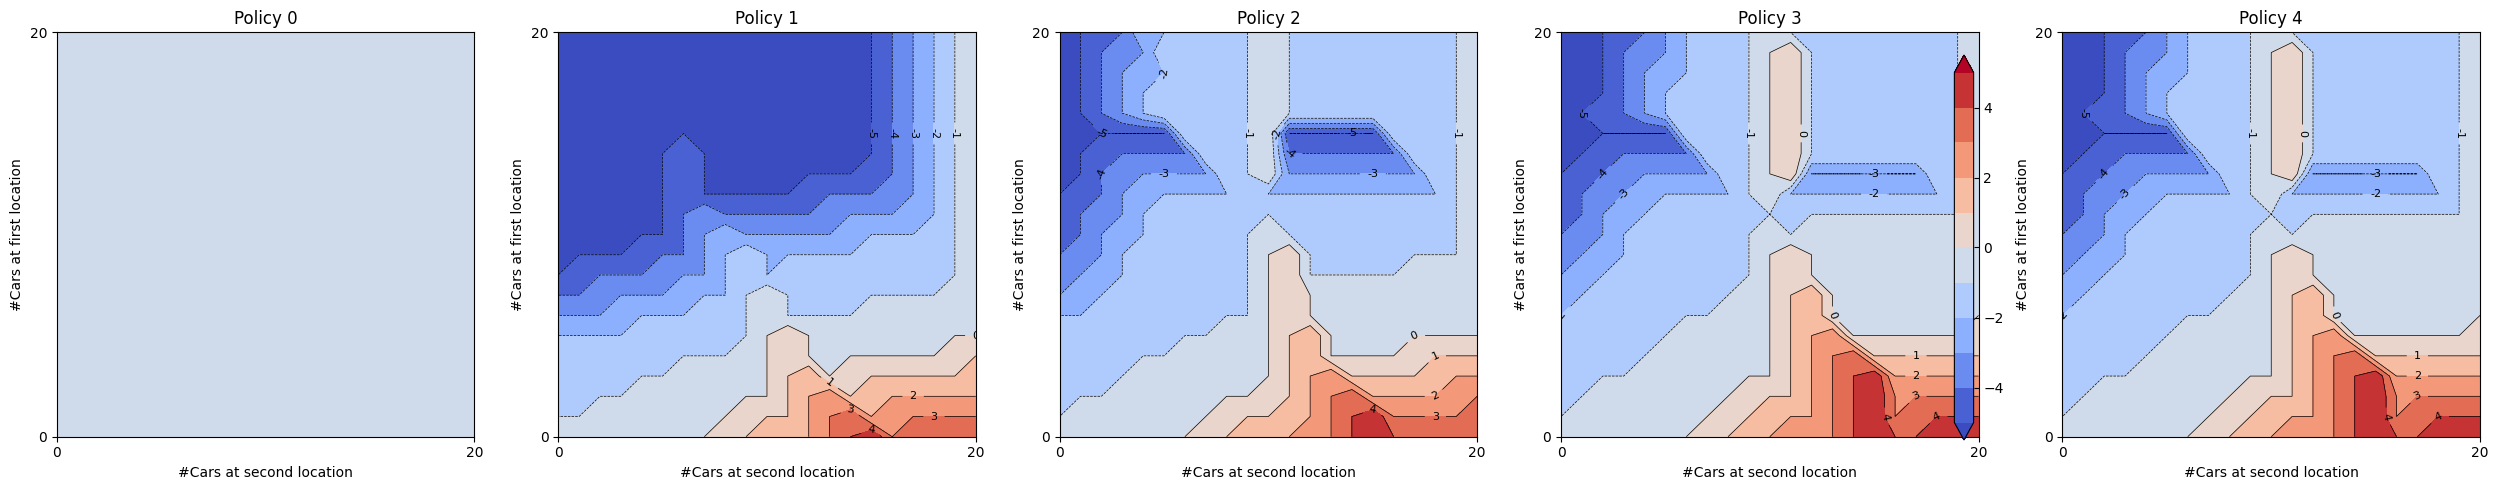

In [114]:
plot_policies(policies)

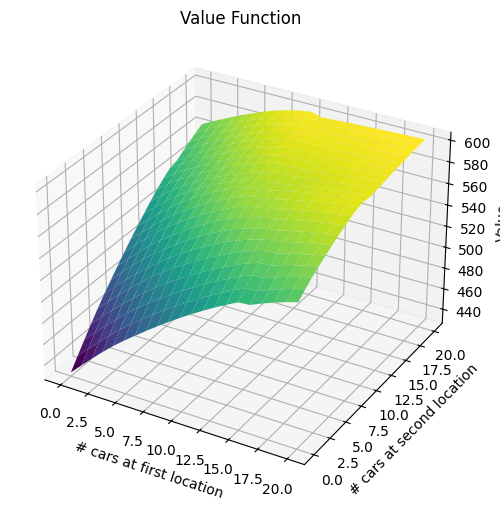

In [115]:
plot_value_fn(value_fn)

In [27]:
# testing for truncated poisson
from truncated_poisson import TruncatedPoisson

In [28]:
poisson = TruncatedPoisson(lambda_val=3, max_trunc_val=20)

In [31]:
print(f"{poisson.expectation(3)=}")
print(f"{poisson.expectation(20)=}")

poisson.expectation(3)=np.float64(2.3278745770338367)
poisson.expectation(20)=np.float64(2.9999999999863762)


In [34]:
# test valid pmf
def pmf_sum(trunc_val: int) -> float:
    total = 0
    for num in range(trunc_val + 1):
        total += poisson.pmf(trunc_val=trunc_val, num=num)
    
    return total

In [35]:
print(f"{pmf_sum(0)=}")
print(f"{pmf_sum(1)=}")
print(f"{pmf_sum(2)=}")
print(f"{pmf_sum(3)=}")
print(f"{pmf_sum(7)=}")
print(f"{pmf_sum(10)=}")
print(f"{pmf_sum(15)=}")
print(f"{pmf_sum(20)=}")

pmf_sum(0)=1
pmf_sum(1)=np.float64(1.0)
pmf_sum(2)=np.float64(1.0)
pmf_sum(3)=np.float64(1.0)
pmf_sum(7)=np.float64(1.0)
pmf_sum(10)=np.float64(1.0)
pmf_sum(15)=np.float64(1.0)
pmf_sum(20)=np.float64(1.0)
